Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Dados de produção mensal de aviões

In [2]:
dados = [
    15, 19, 23, 24, 28, 30, 32, 36,
    16, 20, 23, 25, 29, 31, 34, 39,
    18, 22, 24, 28, 30, 32, 36, 46,
]


In [12]:
tabela_dados = pd.DataFrame(dados, columns=['Valores'])

In [28]:
media = np.mean(dados)
desvio = np.std(dados, ddof=1)

In [29]:
print("Média :", f"{media}")
print("Erro padrão :", f"{stats.sem(dados):.5f}")
print("Mediana :", f"{np.median(dados)}")
print("Moda :", f"{tabela_dados['Valores'].mode()[0]}")
print("Desvio padrão amostral :", f"{desvio:.5f}")
print("Variância amostral :", f"{np.var(dados, ddof=1):.5f}")
print("Curtose :", f"{tabela_dados['Valores'].kurtosis():.5f}")
print("Assimetria :", f"{tabela_dados['Valores'].skew():.5f}")
print("Intervalo: ", f"{np.ptp(dados)}")
print("Mínimo :", f"{np.min(dados)}")
print("Máximo :", f"{np.max(dados)}")
print("Soma: ", f"{np.sum(dados)}")
print("Contagem: ", len(dados))

Média : 27.5
Erro padrão : 1.55689
Mediana : 28.0
Moda : 23
Desvio padrão amostral : 7.62718
Variância amostral : 58.17391
Curtose : 0.04227
Assimetria : 0.40600
Intervalo:  31
Mínimo : 15
Máximo : 46
Soma:  660
Contagem:  24


Comparação

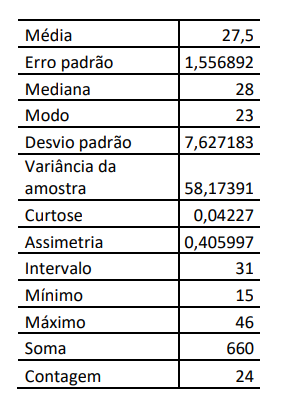

# Teste de Shapiro Wilk

O teste de Shapiro-Wilk (S-W) é baseado em Shapiro e Wilk (1965) e pode ser aplicado para amostras de tamanho 4 ~ n ~ 2.000, sendo uma
alternativa ao teste de normalidade de Kolmogorov-Smirnov (K-S) no caso de pequenas amostras (n < 30).

# Hipóteses

- **(H0):** A amostra provém de uma população com distribuição N (µ, σ)
- **(H1):** a amostra não provém de uma população com distribuição N (µ, σ)


In [ ]:
alfa = 0.01

In [ ]:
estatistica, p_valor = stats.shapiro(dados)

Resultado do Teste de Shapiro-Wilk

In [ ]:
print(f"Estatística W = {estatistica:.4f}")
print(f"p-valor = {p_valor:.4f}")
print(f"Nível de significância = {alfa}")

In [ ]:
if p_valor > alfa:
    print("\np > α → Não rejeitamos H0.")
    print("Conclusão: A amostra pode ser considerada proveniente de uma população com distribuição normal.")
else:
    print("\np ≤ α → Rejeitamos H0.")
    print("Conclusão: A amostra NÃO pode ser considerada proveniente de uma população com distribuição normal.")

<Axes: ylabel='Density'>

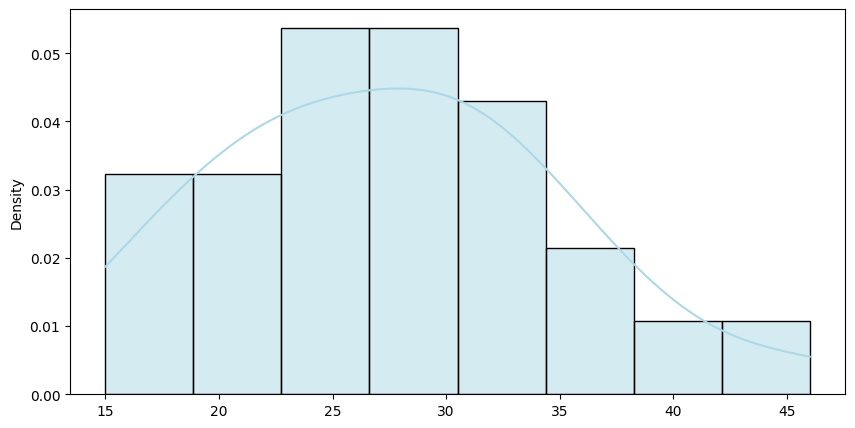

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(dados, kde=True, stat="density", bins=8, color="lightblue", label="Dados")

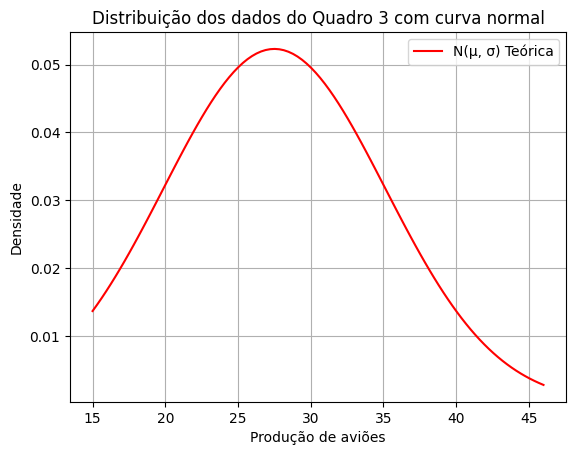

In [26]:
x = np.linspace(min(dados), max(dados), 100)
y = stats.norm.pdf(x, media, desvio)
plt.plot(x, y, color='red', label='N(μ, σ) Teórica')

plt.title("Distribuição dos dados do Quadro 3 com curva normal")
plt.xlabel("Produção de aviões")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()